In [3]:
import numpy as np
from sklearn.preprocessing import normalize
import requests
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2


class WikiEmbedding:

    def __init__(self, fname):
        
        self.w2idx = {}
        self.idx2w = []
    
        with open(fname, 'rb') as f:
            
            m, n = next(f).decode('utf8').strip().split(' ')
            self.E = np.zeros((int(m), int(n)))

            for i, l in enumerate(f):
                l = l.decode('utf8').strip().split(' ')
                w = l[0]
                self.E[i] = np.array(l[1:])
                self.w2idx[w] = i
                self.idx2w.append(w)
                
        self.E = normalize(self.E)
        self.idx2w = np.array(self.idx2w)

    def most_similar(self, w, n=10, min_similarity=0.5):

        
        if type(w) is str:
            w = self.E[self.w2idx[w]]

        scores = self.E.dot(w)
        min_idxs = np.where(scores > min_similarity)
        ranking = np.argsort(-scores[min_idxs])[1:(n+1)]
        nn_ws = self.idx2w[min_idxs][ranking]
        nn_scores = scores[min_idxs][ranking]
        return list(zip(list(nn_ws), list(nn_scores)))

In [2]:
!sudo pip3 install matplotlib

Downloading/unpacking matplotlib
  Running setup.py (path:/tmp/pip_build_root/matplotlib/setup.py) egg_info for package matplotlib
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [2.1.0]
                    python: yes [3.4.3 (default, Nov 28 2017, 16:41:13)  [GCC
                            4.8.4]]
                  platform: yes [linux]
    
    REQUIRED DEPENDENCIES AND EXTENSIONS
                     numpy: yes [version 1.13.3]
                       six: yes [using six version 1.11.0]
                  dateutil: yes [using dateutil version 2.6.1]
    backports.functools_lru_cache: yes [Not required]
              subprocess32: yes [Not required]
                      pytz: yes [using pytz version 2017.3]
                    cycler: yes [cycler was not found. pip/easy_install may
                            attempt to install it after matplotlib.]
                   tornado: yes [using tornado version 4.5.2]
              

    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DFREETYPE_BUILD_TYPE=system -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib_ft2font_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/include/freetype2 -I/usr/local/include -I/usr/include -I. -I/usr/include/python3.4m -c src/mplutils.cpp -o build/temp.linux-x86_64-3.4/src/mplutils.o
    x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.4/src/ft2font.o build/temp.linux-x86_64-3.4/src/ft2font_wrapper.o build/temp.linux-x86_64-3.4/src/mplutils.o -L/usr/local/lib -lfreetype -o build/lib.linux-x86_64-3.4/matplotlib/ft

    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__image_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern/agg24-svn/include -I/usr/include/python3.4m -c extern/agg24-svn/src/agg_vpgen_segmentator.cpp -o build/temp.linux-x86_64-3.4/extern/agg24-svn/src/agg_vpgen_segmentator.o
    x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.4/src/_image.o build/temp.linux-x86_64-3.4/src/mplutils.o build/temp.linux-x86_64-3.4/src/_image_wrapper.o build/temp.linux-x86_64-3.4/src/py_conver

    In file included from src/_path_wrapper.cpp:3:0:
    src/_path.h: In function ‘PyObject* Py_is_sorted(PyObject*, PyObject*)’:
    src/_path.h:1281:17: warning: ‘last_value’ may be used uninitialized in this function [-Wmaybe-uninitialized]
                     if (current_value < last_value) {
                     ^
    src/_path.h:1259:11: note: ‘last_value’ was declared here
             T last_value;
               ^
    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__path_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern/agg24-svn/include -I/usr/include/python3.4m -c extern/agg24-svn/src/agg_bezier_arc.cpp -o build/temp.linux-x86_64-3.4/extern/agg24-svn/src/agg_bezier_arc.o
    x86_64-l

    building 'matplotlib._qhull' extension
    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DMPL_DEVNULL=/dev/null -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__qhull_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern -I/usr/include/python3.4m -c src/qhull_wrap.c -o build/temp.linux-x86_64-3.4/src/qhull_wrap.o
    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DMPL_DEVNULL=/dev/null -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__qhull_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern -I/us

    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DMPL_DEVNULL=/dev/null -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__qhull_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern -I/usr/include/python3.4m -c extern/libqhull/random.c -o build/temp.linux-x86_64-3.4/extern/libqhull/random.o
    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DMPL_DEVNULL=/dev/null -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib__qhull_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/local/include -I/usr/include -I. -Iextern -I/usr/include/python3.4m -c ext

    x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.4/src/py_converters.o build/temp.linux-x86_64-3.4/src/_tkagg.o -L/usr/local/lib -o build/lib.linux-x86_64-3.4/matplotlib/backends/_tkagg.cpython-34m.so
    building 'matplotlib.backends._backend_agg' extension
    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib_backends__backend_agg_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -DFREETYPE_BUILD_TYPE=system -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/include/freetype2 -I/usr/local/include -I/usr/include -I. -Iextern/agg24-svn/include -I/usr/include/python

    x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -DPY_ARRAY_UNIQUE_SYMBOL=MPL_matplotlib_backends__backend_agg_ARRAY_API -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -D__STDC_FORMAT_MACROS=1 -DFREETYPE_BUILD_TYPE=system -I/usr/local/lib/python3.4/dist-packages/numpy/core/include -I/usr/include/freetype2 -I/usr/local/include -I/usr/include -I. -Iextern/agg24-svn/include -I/usr/include/python3.4m -c extern/agg24-svn/src/agg_vpgen_segmentator.cpp -o build/temp.linux-x86_64-3.4/extern/agg24-svn/src/agg_vpgen_segmentator.o
    x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector --param=ssp-buffer-size=4 -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.4/src/mplutils.o build/temp.linux-x86_64-3.4/src/py_converters.o build/temp.lin

In [5]:
en_embedding = WikiEmbedding('2016-09-01_2016-09-30_wikidata_100')

In [9]:
a=[]
b=[]
with open('lhack.tsv') as f:
    for l in f:
        n=l.strip().split("\t")
        try:
        #a.append(n[0])
            if n[1]=='[Music]':
                continue
            else:
                a.append(n[0])
                b.append(n[1])
        except:
            pass
txt=''
for i in b:
    txt=txt+' '+i

In [15]:
en_embedding.most_similar('keyword',min_similarity=0.5)

KeyError: 'keyword'

In [12]:
from getting_started_helpers import get_tsne, plot_tsne

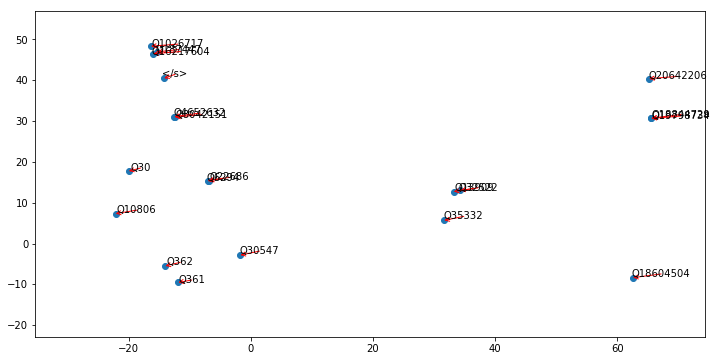

In [13]:
tsne_en_embedding = get_tsne(en_embedding, pca_dim = 10, n_items=5000)
plot_tsne(en_embedding, tsne_en_embedding, n = 20)

In [14]:
def items_to_titles(items, lang):
    lang += 'wiki'
    payload = {'action': 'wbgetentities',
               'props': 'sitelinks/urls',
               'format': 'json',
               'ids': '|'.join(items),               
              }
    r = requests.get('https://www.wikidata.org/w/api.php', params=payload).json()
    
    return parse_wikidata_sitelinks(r, lang, True)
    
    
def titles_to_items(titles, lang):
    lang += 'wiki'
    payload = {'action': 'wbgetentities',
               'props': 'sitelinks/urls',
               'format': 'json',
               'sites': lang,
               'titles': '|'.join(titles),
              }
    r = requests.get('https://www.wikidata.org/w/api.php', params=payload).json()
    
    return parse_wikidata_sitelinks(r, lang, False)


def parse_wikidata_sitelinks(response, lang, item_to_title):

    d = {}
    if 'entities' not in response:
        print ('No entities in reponse')
        return d

    for item, v in response['entities'].items():
        if 'sitelinks' in v:
            if lang in v['sitelinks']:
                title = v['sitelinks'][lang]['title'].replace(' ', '_')
                if item_to_title:
                    d[item] = title
                else:
                    d[title] = item
    return d

In [16]:
def most_similar(embedding, title, lang, n=10, min_similarity=0.7):
    item = titles_to_items([title,], lang)[title]
    nn = embedding.most_similar(item, n=n, min_similarity=min_similarity)
    nn_items = [x[0] for x in nn]
    nn_items_to_titles = items_to_titles(nn_items, lang)
    return [(nn_items_to_titles[x[0]], x[1]) for x in nn if x[0] in nn_items_to_titles]

In [18]:
wikidata_embedding = WikiEmbedding('2016-09-01_2016-09-30_wikidata_100')

MemoryError: 

In [22]:
import nltk
    essays = txt
    tokens = nltk.word_tokenize(essays)
    tagged = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tagged \
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos =='VBG' or pos == 'VB' or pos == 'JJR' or pos == 'JJ' )]
    downcased = [x.lower() for x in nouns]
    joined = " ".join(downcased)
    into_string = str(nouns)



In [27]:
c=[]

In [28]:
for i in b:
    essays = i
    tokens = nltk.word_tokenize(essays)
    tagged = nltk.pos_tag(tokens)
    nouns = [word for word,pos in tagged \
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos =='VBG' or pos == 'VB' or pos == 'JJR' or pos == 'JJ' )]
    downcased = [x.lower() for x in nouns]
    joined = " ".join(downcased)
    c.append(joined.split(' '))
    #into_string = str(nouns)


In [30]:
c[0]

['hi', 'guys', 'boston', 'coding']

In [31]:
d=[]

In [ ]:
for i in c:
    l=[]
    for j in i:
        try:
            l.append(most_similar(en_embedding, j.title(), 'en', n=5, min_similarity=0.6)[0])
        except:
            pass
    d.append(l)
    
    #most_similar(en_embedding, i.tile, 'en', n=5, min_similarity=0.6)

No entities in reponse
No entities in reponse
No entities in reponse
No entities in reponse
No entities in reponse
No entities in reponse
No entities in reponse


In [36]:
most_similar(en_embedding, j.title(), 'en', n=5, min_similarity=0.6)[0]

('Galaxy', 0.92589601400905019)

In [37]:
'key'.title()

'Key'

In [41]:
c

[['hi', 'guys', 'boston', 'coding'],
 ['matt', 'wacom', 'today', 'new'],
 ['tutorial', 'like', 'talk'],
 ['progressive', 'web', 'applications', 'pwace'],
 ['pwace', 'more', 'popularity'],
 ['moment', 'likely'],
 ['using', 'pwa'],
 ['noticing', 'example'],
 ['twitter', 'comm'],
 ['website', 'using'],
 ['progressive', 'web', 'application'],
 ['functionality', 'tutorial'],
 ['explain', 'main', 'building'],
 ['blocks', 'progressive', 'web', 'application'],
 ['explore', 'take'],
 ['existing', 'website', 'edit'],
 ['building', 'blocks', 'project'],
 ['enhance', 'website', 'features'],
 ['progressive', 'web', 'application', 'first'],
 ['website', 'make'],
 ['easy', 'use', 'template'],
 ['available', 'start'],
 ['bootstrap', 'calm', 'start', 'bootstrap', 'calm'],
 ['offers', 'free', 'bootstrap'],
 ['website', 'themes', 'templates'],
 ['much', 'okay'],
 ['apply', 'progressive'],
 ['web', 'app', 'functionality', 'get'],
 ['website', 'use', 'template'],
 ['freelancer'],
 ['template', 'weibull', '

In [40]:
d

[[('Greater_Boston', 0.88224605487407182)],
 [('List_of_international_observances', 0.76501047472444528)],
 [('Moodle', 0.73545344527721346),
  ('Double-Tongued_Dictionary', 0.7717283439735918)],
 [('Web_document', 0.8753047925246652)],
 [('Peer_pressure', 0.69733079978342061)],
 [('Conservative_force', 0.77303254979267866)],
 [],
 [],
 [('Instagram', 0.87226841310182479), ('Type_(Unix)', 0.81904625557726751)],
 [('Web_page', 0.81272040989583894)],
 [('Web_document', 0.8753047925246652),
  ('Application_software', 0.85590563396362518)],
 [('Moodle', 0.73545344527721346)],
 [('Nonbuilding_structure', 0.8591547072525213)],
 [('Web_document', 0.8753047925246652),
  ('Application_software', 0.85590563396362518)],
 [('Cinematic_techniques', 0.74965229647830467)],
 [('Web_page', 0.81272040989583894)],
 [('Nonbuilding_structure', 0.8591547072525213),
  ('Planning', 0.86883067532034131)],
 [('Web_page', 0.81272040989583894)],
 [('Web_document', 0.8753047925246652),
  ('Application_software', 0